In [20]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st 
import scipy.stats as stats

In [21]:
df = pd.read_csv('Sales_add.csv')

In [22]:
df.head(5)

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [24]:
df.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


# 2.To clarify whether there is any increase in sales after entering into digital marketing


In [25]:
#Null hypothesis - no increase in sales after stepping into digital marketing
#Alternate hypothesis-there is increase in sales after stepping into digital marketing

In [26]:
SBF = df['Sales_before_digital_add(in $)']
SAF = df['Sales_After_digital_add(in $)']
stats.levene(SBF, SAF, center='mean')


LeveneResult(statistic=5.171664124853503, pvalue=0.028130575490495715)

In [27]:
#pvalue<0.05 so we reject null hyothesis

In [ ]:
#check for normality
#null hypothesis-They do not follow normal distribution
#alternate hypothesis-They follow normal distribution

In [28]:
from scipy.stats import shapiro
shapiro(df['Sales_before_digital_add(in $)'])


ShapiroResult(statistic=0.9306764006614685, pvalue=0.12674309313297272)

In [ ]:
#pvalue>0.05,so sales before follow normal distribution

In [29]:
shapiro(df['Sales_After_digital_add(in $)'])


ShapiroResult(statistic=0.9702128767967224, pvalue=0.7159645557403564)

In [ ]:
#pvalue>0.05,so sales after follow normal distribution

In [ ]:
#test using ttest
#Null hypothesis - no increase in sales after stepping into digital marketing
#Alternate hypothesis-there is increase in sales after stepping into digital marketing

In [30]:
stats.ttest_ind(SBF,SAF)

Ttest_indResult(statistic=-12.995084451110877, pvalue=2.614368006904645e-16)

In [ ]:
#PVALUE<0.05,SO DIGITAL MARKETING IMPROVED SALES

<AxesSubplot:>

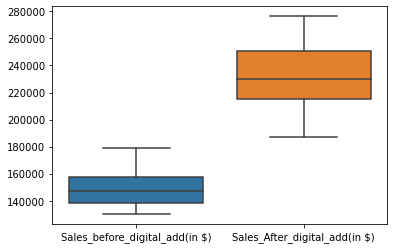

In [31]:
sns.boxplot(data=df[['Sales_before_digital_add(in $)','Sales_After_digital_add(in $)']])

# 2.check whether there is any dependency between the features "Region" and "Manager"


In [ ]:
#Null Hypothesis H0: There is no dependency between the features "Region" and "Manager", i.e., both are independent
# Alternate Hypothesis H1: There is a dependency between the features "Region" and "Manager"

In [33]:
df1 = pd.crosstab(df['Region'], df['Manager'], margins=False,values=df['Sales_After_digital_add(in $)'], aggfunc='sum')
df1

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,1030437,656832,701262
Region - B,939851,231808,429436
Region - C,229336,643654,222106


In [34]:
contigency_pct = pd.crosstab(df['Region'], df['Manager'], margins=False,values=df['Sales_After_digital_add(in $)'],normalize ='all', aggfunc='sum', margins_name="Total Sales")
contigency_pct

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,0.202654,0.129178,0.137916
Region - B,0.184838,0.045589,0.084456
Region - C,0.045103,0.126586,0.043681


In [39]:
c, p, dof, expected = stats.chi2_contingency(contigency_pct) 
p, dof

(0.9979137204823696, 4)

In [ ]:
#  p = 0.997 >0.05, Hence no dependency betweeen the feature "Region" and "Manager" in the dataset